# 探討路殺社使用者行為

該資料集來源由路殺社所提供，資料集所涵蓋時間自1997年至2016.8月

台灣野生動物路死觀察網 https://roadkill.tw/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('export_201608081008_update.csv', encoding='big5')

在該資料集中共有30706筆資料與13種欄位，詳細資訊如下所示

(考量使用者隱私問題，若有涉及相關帳號與記錄者資訊皆不顯示)

In [3]:
data[[col for col in data.columns if col not in [u'紀錄者', u'帳號']]].head()

,identifier,科名,科名（中文）,物種名,物種名（中文）,紀錄時間,地點,授權,經度,緯度,資料來源
0,259,Colubridae,黃頷蛇科,Lycodon ruhstrati ruhstrati,白梅花蛇,2013/10/28,台中市霧峰區,NaN,120.741756,24.060780,路殺社(FB)
1,260,Ardeidae,鷺科,Mesophoyx intermedia intermedia,中白鷺,2013/11/12,台南市六甲區,cc-by,120.337301,23.244977,路殺社(FB)
2,261,Scincidae,石龍子科,Eutropis longicaudata,長尾真稜蜥,2013/11/13,台南市六甲區,cc-by,120.338328,23.247067,路殺社(FB)
3,262,Gekkonidae,壁虎科,Hemidactylus bowringii,無疣蝎虎,2011/8/23,高雄市橋頭區,c,120.296924,22.749034,路殺社(FB)
4,263,Vespertilionidae,蝙蝠科,Pipistrellus abramus,東亞家蝠,2013/7/2,雲林縣古坑鄉,cc-by,120.531874,23.636502,路殺社(FB)


In [4]:
# 資料集結構
data.shape

(30706, 13)

In [5]:
# 資料集欄位名稱
data.keys()

Index([u'identifier', u'科名', u'科名（中文）', u'物種名', u'物種名（中文）', u'紀錄時間', u'紀錄者',
       u'帳號', u'地點', u'授權', u'經度', u'緯度', u'資料來源'],
      dtype='object')

In [6]:
#data[u'紀錄者'].describe()

#count     30531
#unique     2132
#top         ---
#freq       2485
#Name: 紀錄者, dtype: object

## 針對帳號行為來進行分析

In [7]:
user = data[u'帳號']
user.describe()

count           30706
unique            648
top       Tw_Roadkill
freq             4210
Name: 帳號, dtype: object

In [8]:
userData = user.value_counts()
rm_userData = userData.drop(userData.index[[0]])

從資料集內容可得知貢獻程度最高帳號為 Tw_Roadkill，但由於 Tw_Roadkill 屬於尚未對外推廣此活動時之共用帳號，因此後續分析上會與一般使用者分開

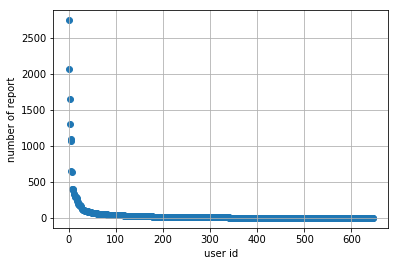

In [9]:
plt.grid(True)
plt.scatter(range(rm_userData.shape[0]), rm_userData)
plt.xlabel('user id')
plt.ylabel('number of report')

縱軸為該名使用者所回報筆數，橫軸則為依貢獻數目排序之使用者，從圖中可以清楚了解絕大多數回報資料來自少數的使用者

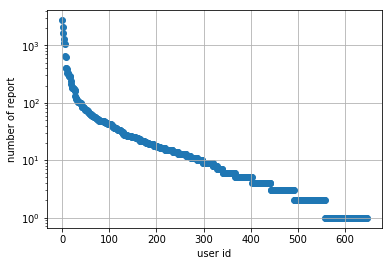

In [10]:
plt.grid(True)
plt.scatter(range(647), rm_userData)
plt.xlabel('user id')
plt.ylabel('number of report')
plt.yscale('log')

回報筆數部分以Log級數呈現

In [11]:
rm_userData.describe()

count     647.000000
mean       40.952087
std       177.245512
min         1.000000
25%         3.000000
50%         8.000000
75%        23.000000
max      2746.000000
Name: 帳號, dtype: float64

In [12]:
userpd = pd.DataFrame(userData)
userpd.columns = ['count']
userpd['cum'] = userpd['count'].cumsum()
userpd['cum_each'] = 100*userpd['count']/userpd['count'].sum()
userpd['cum_perc'] = 100*userpd.cum/userpd['count'].sum()
print(userpd.head().to_string(index=False))

count    cum   cum_each   cum_perc
 4210   4210  13.710675  13.710675
 2746   6956   8.942878  22.653553
 2073   9029   6.751124  29.404677
 1648  10677   5.367029  34.771706
 1311  11988   4.269524  39.041230


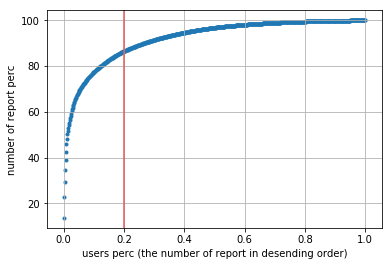

In [13]:
plt.grid(True)
plt.scatter(np.linspace(0, 1, num=userpd.shape[0]), userpd['cum_perc'], marker='.')
plt.axvline(x=0.2, color='#E05C5D')
plt.xlabel('users perc (the number of report in desending order)')
plt.ylabel('number of report perc')

從CDF圖中可得知資料集中近9成資料來自於約20%的帳號

In [14]:
roadkill = data[data[u'帳號'] == 'Tw_Roadkill']
roadkill[[col for col in roadkill.columns if col not in [u'紀錄者', u'帳號']]].head()

,identifier,科名,科名（中文）,物種名,物種名（中文）,紀錄時間,地點,授權,經度,緯度,資料來源
0,259,Colubridae,黃頷蛇科,Lycodon ruhstrati ruhstrati,白梅花蛇,2013/10/28,台中市霧峰區,NaN,120.741756,24.060780,路殺社(FB)
3,262,Gekkonidae,壁虎科,Hemidactylus bowringii,無疣蝎虎,2011/8/23,高雄市橋頭區,c,120.296924,22.749034,路殺社(FB)
10,269,Rallidae,秧雞科,Gallinula chloropus chloropus,紅冠水雞,2013/10/13,台南市麻豆區,c,120.252072,23.201375,路殺社(FB)
32,291,Colubridae,黃頷蛇科,Orthriophis taeniurus friesei,台灣黑眉錦蛇,2013/9/29,高雄市林園區,c,120.385090,22.496674,路殺社(FB)
34,293,Gekkonidae,壁虎科,Hemidactylus bowringii,無疣蝎虎,2011/8/23,高雄市橋頭區,c,120.296924,22.749034,路殺社(FB)


In [15]:
roadkillpd = pd.DataFrame(roadkill[u'紀錄者'].value_counts())
roadkillpd.columns = ['count']
roadkillpd['cum'] = roadkillpd['count'].cumsum()
roadkillpd['cum_each'] = 100*roadkillpd['count']/roadkillpd['count'].sum()
roadkillpd['cum_perc'] = 100*roadkillpd.cum/roadkillpd['count'].sum()
print(roadkillpd.head().to_string(index=False))

count  cum  cum_each  cum_perc
   66   66  1.623217  1.623217
   37  103  0.909985  2.533202
   31  134  0.762420  3.295622
   27  161  0.664043  3.959666
   27  188  0.664043  4.623709


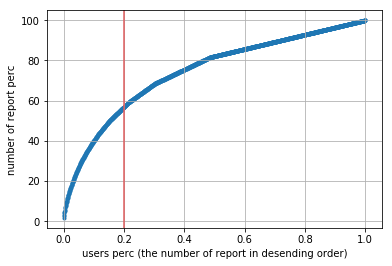

In [16]:
plt.grid(True)
plt.scatter(np.linspace(0, 1, num=roadkillpd.shape[0]), roadkillpd['cum_perc'], marker='.')
plt.axvline(x=0.2, color='#E05C5D')
plt.xlabel('users perc (the number of report in desending order)')
plt.ylabel('number of report perc')

Tw_roadkill 帳號內紀錄者亦有少數使用者提供大多數資料的狀況，但整體較一般使用者來得積極故長尾效應並不是這麼明顯

In [17]:
interval = []
multiuser = []
for index, row in userpd.iterrows():
    date = data[data[u'帳號'] == index].sort_values(u'紀錄時間')
    date = date.dropna(subset=[u'紀錄時間'])
    
    check = 0
    for i, r in date.iterrows(): 
        if(r[u'紀錄者'] != r[u'帳號']):
            check = 1
            break
        
    multiuser.append(check)
    
    if(date.shape[0] == 0):
        interval.append(0)
        continue
    
    b = date.iloc[0][u'紀錄時間']
    s = date.iloc[date.shape[0]-1][u'紀錄時間']
    interval.append((pd.to_datetime(s) - pd.to_datetime(b))/pd.Timedelta('1 days'))
    
userpd['interval'] = interval
userpd['multiuser'] = multiuser
print(userpd.head().to_string(index=False))

count    cum   cum_each   cum_perc  interval  multiuser
 4210   4210  13.710675  13.710675    4998.0          1
 2746   6956   8.942878  22.653553    1374.0          1
 2073   9029   6.751124  29.404677    3580.0          0
 1648  10677   5.367029  34.771706    1780.0          1
 1311  11988   4.269524  39.041230    1380.0          1


此處則針對單一帳號計算貢獻資料持續時間與貢獻數目，來觀看使用者行為之分佈

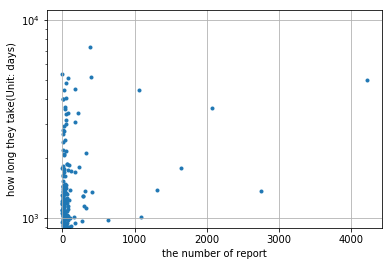

In [18]:
plt.grid(True)
plt.scatter(userpd['count'], userpd['interval'], marker='.')
plt.xlabel('the number of report')
plt.ylabel('how long they take(Unit: days)')
# plt.xscale('log')
plt.yscale('log')

縱軸為方便比較採Log級數呈現，從上圖可發現多數使用者持續貢獻時間短，筆數也較少，Tw_roadkill則屬於貢獻時間長且筆數亦較多帳號

In [19]:
print(userpd.sort_values('interval', ascending=0).head(10).to_string(index=False))

count    cum   cum_each   cum_perc  interval  multiuser
  382  16624   1.244057  54.139256    7318.0          1
    3  30353   0.009770  98.850388    5344.0          0
  399  16242   1.299420  52.895200    5182.0          1
   84  22359   0.273562  72.816388    5075.0          1
 4210   4210  13.710675  13.710675    4998.0          1
   49  24671   0.159578  80.345861    4791.0          0
  173  20299   0.563408  66.107601    4499.0          1
 1067  14148   3.474891  46.075686    4437.0          1
   23  27428   0.074904  89.324562    4423.0          1
   59  23823   0.192145  77.584186    4038.0          0


In [20]:
print(userpd.sort_values('interval', ascending=0)[100:110].to_string(index=False))

count    cum  cum_each   cum_perc  interval  multiuser
   22  27518  0.071647  89.617664    1167.0          1
   15  28624  0.048850  93.219566    1161.0          0
   29  26638  0.094444  86.751775    1154.0          0
  297  17904  0.967238  58.307823    1147.0          0
   76  22756  0.247509  74.109295    1144.0          1
   24  27310  0.078161  88.940272    1139.0          0
   15  28699  0.048850  93.463818    1133.0          0
   22  27672  0.071647  90.119195    1130.0          1
   11  29323  0.035824  95.495994    1121.0          1
   13  28948  0.042337  94.274735    1120.0          0


若將貢獻時間進行排序可從multiuser（1為多位使用者，0為單一使用者）欄位得知，通常貢獻時間長的帳號多為多個記錄者共同擁有，僅有少數單一使用者帳號貢獻大量的資料

## 透過地圖展示帳號所回報之熱點分布

下圖以帳號 Tw_Roadkill 為例子，並隨機尋找一組帳號來進行展繪

In [21]:
import folium
from folium import plugins

In [22]:
usercheck = u'Tw_Roadkill'

osmMap = folium.Map(location=[23.5, 121], zoom_start=7)
m = data[data[u'帳號'] == usercheck]
m = m.dropna(subset=[u'緯度'])
popups = m[u'物種名']
locations = list(zip(m[u'緯度'], m[u'經度'], [1]*m.shape[0]))
osmMap.add_child(plugins.HeatMap(locations))

In [23]:
usercheck = userpd.iloc[9].name

osmMap = folium.Map(location=[23.5, 121], zoom_start=7)
m = data[data[u'帳號'] == usercheck]
m = m.dropna(subset=[u'緯度'])
popups = m[u'物種名']
locations = list(zip(m[u'緯度'], m[u'經度'], [1]*m.shape[0]))
osmMap.add_child(plugins.HeatMap(locations))

## 不同回報方式的變化

In [24]:
source = data[[u'紀錄時間', u'資料來源']]
source.columns = ['date', 'method']
source = source.sort_values('date', ascending=1)
source.head()

,date,method
18378,1996/7/18,路殺社(FB)
5088,1996/7/18,路殺社(FB)
1210,2001/9/23,路殺社(FB)
4686,2002/1/31,路殺社(FB)
5346,2002/10/9,路殺社(FB)


In [25]:
source['date'] = pd.to_datetime(source['date'])

In [26]:
source.shape

(30706, 2)

In [27]:
fb = source[source['method'] == u'路殺社(FB)']
app = source[source['method'] == u'App回報']
online = source[source['method'] == u'線上回報']
other = source[source['method'] == u'other']

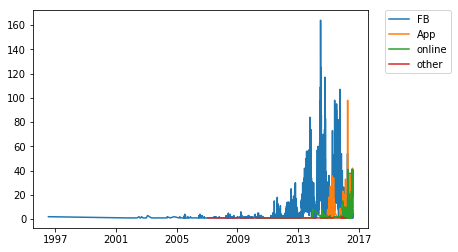

In [28]:
dataset = [fb, app, online, other]
label = ['FB', 'App', 'online', 'other']
for i, _ in enumerate(dataset):
    _pd = pd.DataFrame(_['date'].value_counts())
    _pd = _pd.sort_index()
    _pd.columns = ['count']
    plt.plot(_pd, label=label[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


由於少數資料透過過往照片所新增，下圖則聚焦於2014年至今回報方式的變化

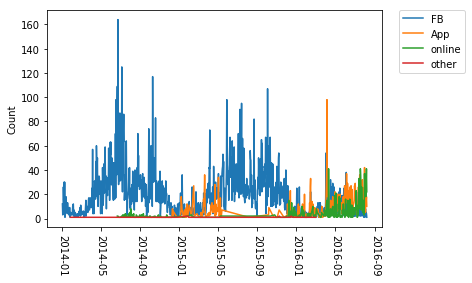

In [29]:
fb = source[(source['method'] == u'路殺社(FB)') & (source['date'] > '2014-01-01')]
app = source[(source['method'] == u'App回報') & (source['date'] > '2014-01-01')]
online = source[(source['method'] == u'線上回報') & (source['date'] > '2014-01-01')]
other = source[(source['method'] == u'other') & (source['date'] > '2014-01-01')]

dataset = [fb, app, online, other]
label = ['FB', 'App', 'online', 'other']
for i, _ in enumerate(dataset):
    _pd = pd.DataFrame(_['date'].value_counts())
    _pd = _pd.sort_index()
    _pd.columns = ['count']
    plt.plot(_pd, label=label[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(rotation=-90)
plt.ylabel('Count')

In [30]:
stkfb = fb['date'].value_counts().resample('M').sum()
stkapp = app['date'].value_counts().resample('M').sum()
stkonline = online['date'].value_counts().resample('M').sum()
stkother = other['date'].value_counts().resample('M').sum()

base = pd.Series(0)
stackDataset = [stkfb, stkapp, stkonline, stkother]
label = ['FB', 'App', 'online', 'other']

for i, _ in enumerate(stackDataset):
    if(_.shape[0] > base.shape[0]):
        base = pd.DataFrame(_)
        base.columns = [label[i]]

for i, _ in enumerate([x for x in label if x != base.keys()[0]]):
    base[_] = stackDataset[label.index(_)]
    
base[np.isnan(base)] = 0
base.head()

,FB,App,online,other
2014-01-31,283,0.0,0.0,1.0
2014-02-28,124,0.0,0.0,2.0
2014-03-31,215,0.0,0.0,1.0
2014-04-30,763,0.0,0.0,3.0
2014-05-31,919,0.0,0.0,1.0


以月份為單位，統計不同方式所回報數量以及該月回報總數量之關係

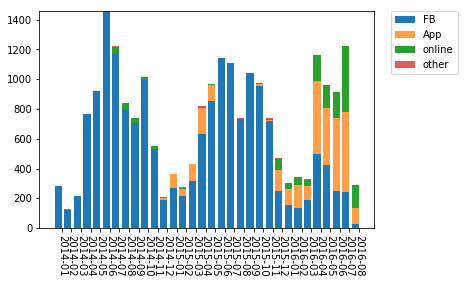

In [33]:
barlen = [i+1 for i in range(len(base.iloc[:, [0]]))]
tickpos = [i+(0.75/2) for i in barlen]
colorbar = ['#1F77B4', '#FF9E49', '#2CA02C', '#E05C5D']

for i in range(base.shape[1]):
    plt.bar(barlen, base[label[i]], color=colorbar[i], width=0.75, 
            bottom=sum(base[label[_]] for _ in range(i)), label=label[i])

plt.xticks(tickpos, base.index.strftime('%Y-%m'), rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

透過上方的長條堆疊圖可以發現不同回報方式之消長，近期也可以發現使用者回報資料上不在以FB為主，不像早期僅透過FB來進行回報，從2014來也資料回報也都集中於該年4到6月